# Emerging Markets FX analysis

In [438]:
import pandas as pd 
import numpy as np 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

In [439]:
df = pd.read_csv('./EM_FX_data.csv')
df.head(5)

,BRL_FX_Spot,50d_200d_cross,CA,TB,rate,REER
0,3.7093,1,-0.4,5981,6.1940,69.1214
1,3.7114,1,-0.4,5981,6.2523,68.8848
2,3.7083,1,-0.4,5981,6.2117,67.6090
3,3.9071,1,-0.4,5981,6.2803,64.6053
4,3.8510,1,-0.4,5981,5.7569,66.2307


In [440]:
df.shape

(4668, 6)

In [441]:
df.tail()

,BRL_FX_Spot,50d_200d_cross,CA,TB,rate,REER
4663,1.7790,0,-3.82,258,16.5550,76.96
4664,1.7885,0,-3.82,258,16.0870,76.34
4665,1.7910,0,-3.82,258,17.2698,76.49
4666,1.7910,0,-3.82,258,17.6155,76.25
4667,1.7970,0,-3.82,258,17.6155,76.26


Looking at the numeric columns:

In [442]:
df.describe()

,BRL_FX_Spot,50d_200d_cross,CA,TB,rate,REER
count,4668.000000,4668.000000,4668.000000,4668.000000,4668.000000,4668.000000
mean,2.455517,0.462296,-1.608700,2243.605184,11.848990,78.909483
std,0.629299,0.498630,1.962764,2020.252014,4.710439,14.630814
min,1.539100,0.000000,-4.390000,-4067.000000,-6.870000,42.430000
25%,1.949650,0.000000,-3.280000,800.000000,8.337925,67.590775
50%,2.290100,0.000000,-1.730000,2346.000000,11.208750,79.832000
75%,2.961300,1.000000,0.300000,3522.000000,14.813050,89.542500
max,4.178300,1.000000,1.830000,7661.000000,26.227700,109.690000


The test portion of data:

In [443]:
df.shape

(4668, 6)

Getting the number of times a value shows up in a column:

In [444]:
df.iloc[0] #grabbing the first row

BRL_FX_Spot          3.7093
50d_200d_cross       1.0000
CA                  -0.4000
TB                5981.0000
rate                 6.1940
REER                69.1214
Name: 0, dtype: float64

In [445]:
df.iloc[0:5]

,BRL_FX_Spot,50d_200d_cross,CA,TB,rate,REER
0,3.7093,1,-0.4,5981,6.1940,69.1214
1,3.7114,1,-0.4,5981,6.2523,68.8848
2,3.7083,1,-0.4,5981,6.2117,67.6090
3,3.9071,1,-0.4,5981,6.2803,64.6053
4,3.8510,1,-0.4,5981,5.7569,66.2307


In [446]:
df[["BRL_FX_Spot","TB"]].head() #selecting columns

,BRL_FX_Spot,TB
0,3.7093,5981
1,3.7114,5981
2,3.7083,5981
3,3.9071,5981
4,3.8510,5981


In [447]:
df[["BRL_FX_Spot","TB"]].iloc[0:5]

,BRL_FX_Spot,TB
0,3.7093,5981
1,3.7114,5981
2,3.7083,5981
3,3.9071,5981
4,3.8510,5981


### EDA
- BRL_FX_spot is the target variable
- Need to consider adding more features

In [448]:
golden_df = df[df["50d_200d_cross"] == 0]
golden_df.head(10)

,BRL_FX_Spot,50d_200d_cross,CA,TB,rate,REER
155,3.2729,0,-0.62,5201,6.1788,76.8748
156,3.2519,0,-0.62,5201,6.1949,76.7288
157,3.3138,0,-0.62,5201,6.2725,76.0359
158,3.2660,0,-0.62,5201,6.3710,76.7437
159,3.2660,0,-0.62,5201,6.2659,76.8374
160,3.2713,0,-0.62,5201,6.2472,76.7699
161,3.2805,0,-0.62,5178,6.3999,77.1469
162,3.2356,0,-0.62,5178,6.3579,76.9589
163,3.2973,0,-0.62,5178,6.2072,77.1447
164,3.2348,0,-0.62,5178,6.2605,77.0192


In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4668 entries, 0 to 4667
Data columns (total 6 columns):
BRL_FX_Spot       4668 non-null float64
50d_200d_cross    4668 non-null int64
CA                4668 non-null float64
TB                4668 non-null int64
rate              4668 non-null float64
REER              4668 non-null float64
dtypes: float64(4), int64(2)
memory usage: 218.9 KB


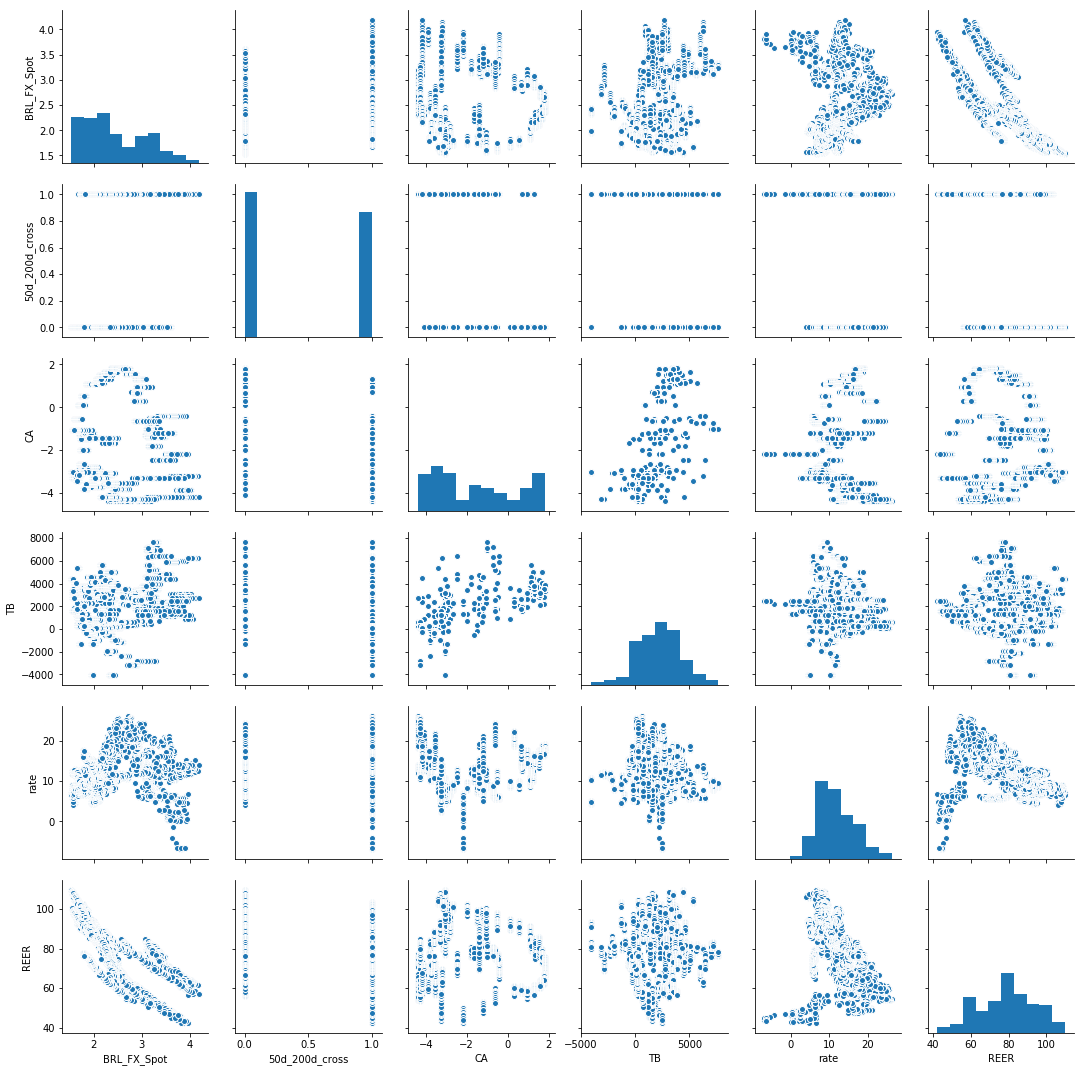

In [450]:
## Let's do a pairplot with seaborn to get a sense of the variables in this data set
sns.pairplot(df)

### Linear relationship based on pairplot:

- Which variables seem to have the strongest correlations with BRL_FX_spot?

In [451]:
y=df['BRL_FX_Spot']
X=df.drop('BRL_FX_Spot', axis=1) 
X.columns

Index(['50d_200d_cross', 'CA', 'TB', 'rate', 'REER'], dtype='object')

In [452]:
print(y.shape)
print(X.shape)

(4668,)
(4668, 5)


### Normality

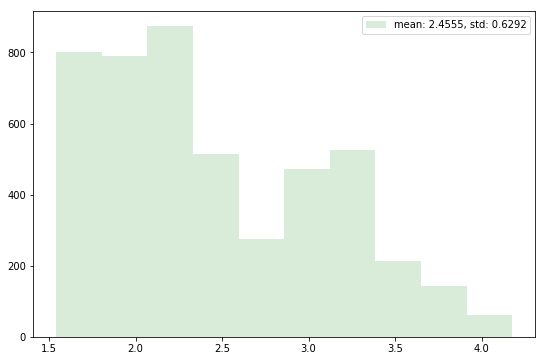

In [453]:
plt.figure(figsize=(9, 6))
#plt.xlim(-0.4, 0.4)
#plt.ylim(0, 4.3)
label = "mean: %.4f, std: %.4f" % (np.mean(y.values), np.std(y.values))
plt.hist(y.values, color='green', bins=10, normed=False, alpha=0.15, label=label)
plt.legend()
plt.show()

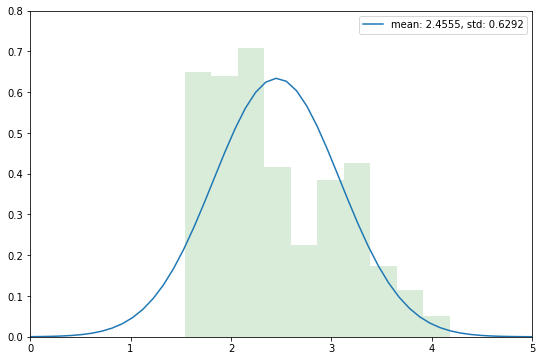

In [454]:
plt.figure(figsize=(9, 6))
plt.xlim(0, 5)
plt.ylim(0, 0.8)
plt.hist(y.values, color='green', bins=10, normed=True, alpha=0.15)
my_norm = stats.norm(np.mean(y.values), np.std(y.values)).pdf
label = "mean: %.4f, std: %.4f" % (np.mean(y.values), np.std(y.values))
plt.plot(np.linspace(0, 5), my_norm(np.linspace(0, 5)), label=label)
plt.legend()
plt.show()

### Train and test set

In [455]:
#Split the data 70-30 train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [456]:
X_train.shape, X_test.shape

((3267, 5), (1401, 5))

In [457]:
X_train.columns

Index(['50d_200d_cross', 'CA', 'TB', 'rate', 'REER'], dtype='object')

## Linear Regression

In [458]:
## LinearRegression model with only numeric predictors
## SalePrice as the target

lr_model1 = LinearRegression()
lr_model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [459]:
## Let us look at the (single) variable coefficient and the intercept
lr_model1.intercept_

5.816440924040732

In [460]:
list(zip(X_train.columns,lr_model1.coef_))

[('50d_200d_cross', -0.057363823088980664),
 ('CA', -0.0812253210457968),
 ('TB', 0.00011267564615068138),
 ('rate', -0.03792895745535199),
 ('REER', -0.041404150514286385)]

In [461]:
# Getting predictions of the model on the test set

test_set_pred1 = lr_model1.predict(X_test)

In [462]:
test_set_pred1

array([2.06838145, 1.73745831, 2.11413947, ..., 2.27836411, 2.47697597,
       2.43592598])

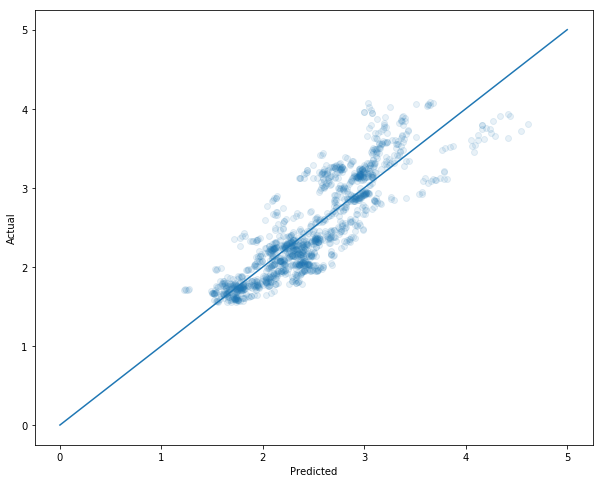

In [463]:
## Plotting the actual vs expected house price (along with the line x=y for reference)
plt.figure(figsize=(10,8))
plt.scatter(test_set_pred1,y_test,alpha=.1)
plt.plot(np.linspace(0,5,1000),np.linspace(0,5,1000))
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [464]:
lr_model1.score(X_train,y_train)

0.7588805210877291

In [465]:
lr_model1.score(X_test,y_test)

0.7584701715598617

In [466]:
# Mean Squared Error
def mean_squared_error(true, pred):
    return np.mean((pred - true)**2)

mean_squared_error(y_test,test_set_pred1)

0.09348192048722073

In [467]:
# Root Mean Squared Error
def root_mean_squared_error(true,pred):
    return np.sqrt(mean_squared_error(true,pred))

root_mean_squared_error(y_test,test_set_pred1)

0.30574813243455917

In [468]:
# Mean Absolute Deviation
def mean_absolute_deviation(true,pred):
    return np.mean(np.abs(pred - true))

mean_absolute_deviation(y_test, test_set_pred1)

0.2402846860410522

In [469]:
def R2_score(true,pred):
    y_bar_test = np.mean(true)
    SSE = np.sum((pred - true)**2)
    SST = np.sum((true - y_bar_test)**2)
    return 1.-SSE/SST

R2_score(y_test, test_set_pred1)

0.7584701715598618

### Lasso regression

In [470]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

In [471]:
def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv = 5))
    return(rmse)

In [472]:
alpha_vals = np.logspace(-4, 4, 1000)

model_lasso_5CV = LassoCV(alphas = alpha_vals, normalize=True, cv=5).fit(X_train, y_train) 
print("Best alpha value: " + str(model_lasso_5CV.alpha_))
print("Corresponding R^2 score: " + str(model_lasso_5CV.score(X_train, y_train)))

Best alpha value: 0.0001
Corresponding R^2 score: 0.7576211721799746


In [473]:
print("Model using 5-fold CV for training:")
print("With 5-fold CV, the RMSE values are: " + str(rmse_cv(model_lasso_5CV, X_train, y_train)))
print("Average RMSE: " + str(rmse_cv(model_lasso_5CV, X_train, y_train).mean()))

Model using 5-fold CV for training:
With 5-fold CV, the RMSE values are: [0.31670752 0.31786916 0.31015244 0.31061025 0.30301529]
Average RMSE: 0.311670934734715


In [474]:
test_set_pred2 = model_lasso_5CV.predict(X_test)

In [475]:
model_lasso_5CV.score(X_train,y_train)

0.7576211721799746

In [476]:
model_lasso_5CV.score(X_test,y_test)

0.757342331951734

In [477]:
test_set_pred2

array([2.0740624 , 1.76842654, 2.09594307, ..., 2.25108169, 2.51784849,
       2.43964328])

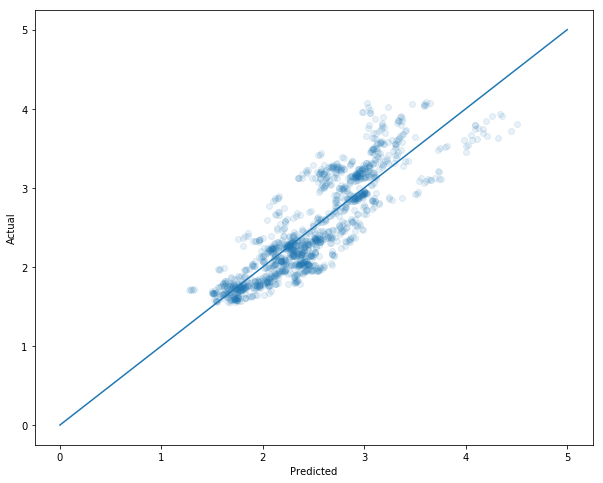

In [478]:
## Plotting the actual vs expected (along with the line x=y for reference)
plt.figure(figsize=(10,8))
plt.scatter(test_set_pred2,y_test,alpha=.1)
plt.plot(np.linspace(0,5,1000),np.linspace(0,5,1000))
plt.xlabel("Predicted")
plt.ylabel("Actual");

### Plotting lasso

In [479]:
lasso = linear_model.Lasso(alpha=1)

alphas_lasso = np.logspace(-4, 4, 1000)
coef_lasso = []
for i in alphas_lasso:
    lasso.set_params(alpha=i).fit(X_train,y_train)
    coef_lasso.append(lasso.coef_)



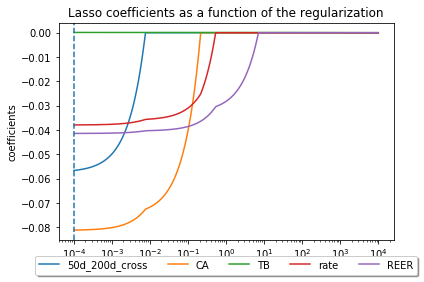

In [480]:
plt.figure(figsize=(20,20))
columns = X_train.columns
df_coef = pd.DataFrame(coef_lasso, index=alphas_lasso, columns=columns)
title = 'Lasso coefficients as a function of the regularization'
df_coef.plot(logx=True, title=title)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

plt.axvline(x=model_lasso_5CV.alpha_,ls="dashed")
plt.savefig('./lasso.png', bbox_inches='tight', dpi = 300)

plt.show()

In [481]:
beta_vals = pd.Series(model_lasso_5CV.coef_, index = X_train.columns)

print("Variables kept: " + str(sum(beta_vals != 0)))
print("Variables eliminated: " + str(sum(beta_vals == 0)))

Variables kept: 5
Variables eliminated: 0


### Finding the best lambda through grid search

In [482]:
from sklearn.model_selection import GridSearchCV
from sklearn import datasets

lasso = linear_model.Lasso()
#alphas_lasso = np.logspace(-4, 4, 1000)
grid_param = [{'alpha': alphas_lasso}]
## fit all models
para_search = GridSearchCV(estimator=lasso, param_grid=grid_param, scoring='neg_mean_squared_error', cv=3, return_train_score=True)
para_search = para_search.fit(X_train, y_train)

best_score=para_search.best_score_
best_alpha=para_search.best_params_['alpha']
print(best_score)
print(best_alpha)


-0.0968229852763975
0.00010186101701559753


In [483]:
## coefficients
lasso = linear_model.Lasso(alpha=best_alpha) # create a lasso instance
lasso.fit(X_train,y_train) # fit data
lasso.intercept_ # print out the coefficients

5.814726749410112

In [484]:
list(zip(X_train.columns,lasso.coef_))

[('50d_200d_cross', -0.056600761877761634),
 ('CA', -0.0811098198669604),
 ('TB', 0.00011267532888418096),
 ('rate', -0.03789827398919148),
 ('REER', -0.04138914839050831)]

In [485]:
features_df = pd.DataFrame({'Feature': X_train.columns,
        'Coefficient': lasso.coef_}) 

In [486]:
features_df

,Coefficient,Feature
0,-0.056601,50d_200d_cross
1,-0.081110,CA
2,0.000113,TB
3,-0.037898,rate
4,-0.041389,REER


In [487]:
test_set_pred2 = lasso.predict(X_test)

In [488]:
root_mean_squared_error(y_test,test_set_pred2)

0.3057534822618921

In [489]:
lasso.score(X_test,y_test) #built-in formula

0.7584617191505388

In [490]:
R2_score(y_test, test_set_pred2) #same as above

0.758461719150539

Looks like after optimatizing with lasso, one feature was effectively elminated and R^2 improved very slightly after regularization.

### Feature Engineering

In [518]:
df2=df.copy()

In [519]:
df2['TB'].head(22)

0     5981
1     5981
2     5981
3     5981
4     5981
5     5981
6     5981
7     5981
8     5981
9     5935
10    5935
11    5935
12    5935
13    5935
14    5935
15    5935
16    5935
17    5935
18    5935
19    5935
20    5935
21    5935
Name: TB, dtype: int64

In [520]:
df2['TB'].shift(-63).head(80)

0     5002.0
1     5002.0
2     5002.0
3     5002.0
4     5002.0
5     5002.0
6     5002.0
7     5002.0
8     5002.0
9     5002.0
10    5002.0
11    5002.0
12    2816.0
13    2816.0
14    2816.0
15    2816.0
16    2816.0
17    2816.0
18    2816.0
19    2816.0
20    2816.0
21    2816.0
22    2816.0
23    2816.0
24    2816.0
25    2816.0
26    2816.0
27    2816.0
28    2816.0
29    2816.0
       ...  
50    4998.0
51    4998.0
52    4998.0
53    4998.0
54    3546.0
55    3546.0
56    3546.0
57    3546.0
58    3546.0
59    3546.0
60    3546.0
61    3546.0
62    3546.0
63    3546.0
64    3546.0
65    3546.0
66    3546.0
67    3546.0
68    3546.0
69    3546.0
70    3546.0
71    3546.0
72    3546.0
73    3546.0
74    3546.0
75    3546.0
76    5201.0
77    5201.0
78    5201.0
79    5201.0
Name: TB, Length: 80, dtype: float64

In [521]:
df2['TB_3m_ago']=df2['TB'].shift(-63)

In [522]:
df2.tail(5)

,BRL_FX_Spot,50d_200d_cross,CA,TB,rate,REER,TB_3m_ago
4663,1.7790,0,-3.82,258,16.5550,76.96,NaN
4664,1.7885,0,-3.82,258,16.0870,76.34,NaN
4665,1.7910,0,-3.82,258,17.2698,76.49,NaN
4666,1.7910,0,-3.82,258,17.6155,76.25,NaN
4667,1.7970,0,-3.82,258,17.6155,76.26,NaN


In [523]:
df2.shape

(4668, 7)

In [524]:
df2.dropna(axis=0, how='any',inplace=True)

In [525]:
df2.shape

(4605, 7)

In [526]:
df2['TB_3m_ch']=((df2['TB']-df2['TB_3m_ago'])/df2['TB_3m_ago'])*100

In [500]:
df2.head(30)

,BRL_FX_Spot,50d_200d_cross,CA,TB,rate,REER,TB_3m_ago,TB_3m_ch
0,3.7093,1,-0.4,5981,6.1940,69.1214,5002.0,19.572171
1,3.7114,1,-0.4,5981,6.2523,68.8848,5002.0,19.572171
2,3.7083,1,-0.4,5981,6.2117,67.6090,5002.0,19.572171
3,3.9071,1,-0.4,5981,6.2803,64.6053,5002.0,19.572171
4,3.8510,1,-0.4,5981,5.7569,66.2307,5002.0,19.572171
5,3.8094,1,-0.4,5981,5.7190,67.3333,5002.0,19.572171
6,3.7456,1,-0.4,5981,5.9129,67.7830,5002.0,19.572171
7,3.7655,1,-0.4,5981,5.8308,67.5631,5002.0,19.572171
8,3.7239,1,-0.4,5981,5.7405,68.1205,5002.0,19.572171
9,3.7239,1,-0.4,5935,5.6293,67.7661,5002.0,18.652539


In [527]:
y2=df2['BRL_FX_Spot']
X2=df2.drop('BRL_FX_Spot', axis=1) 
X2.columns

Index(['50d_200d_cross', 'CA', 'TB', 'rate', 'REER', 'TB_3m_ago', 'TB_3m_ch'], dtype='object')

In [528]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,random_state=42)

In [529]:
X2_train.head(5)

,50d_200d_cross,CA,TB,rate,REER,TB_3m_ago,TB_3m_ch
2005,0,-3.18,1071,8.0260,102.54,2267.0,-52.756948
3593,1,1.31,3450,16.0073,60.06,3128.0,10.294118
2836,0,1.10,3822,9.9704,89.48,4181.0,-8.586463
4268,0,-4.10,173,20.4832,66.27,251.0,-31.075697
1289,1,-3.06,2301,7.8264,83.33,152.0,1413.815789


In [530]:
selected_columns_2 = ['50d_200d_cross', 'CA', 'rate','REER','TB_3m_ch']

In [536]:
X2_train[selected_columns_2].head(5)

,50d_200d_cross,CA,rate,REER,TB_3m_ch
2005,0,-3.18,8.0260,102.54,-52.756948
3593,1,1.31,16.0073,60.06,10.294118
2836,0,1.10,9.9704,89.48,-8.586463
4268,0,-4.10,20.4832,66.27,-31.075697
1289,1,-3.06,7.8264,83.33,1413.815789


In [531]:
lr_model2 = LinearRegression()
lr_model2.fit(X2_train[selected_columns_2],y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [532]:
list(zip(X2_train[selected_columns_2].columns,lr_model2.coef_))

[('50d_200d_cross', -0.09279849511569443),
 ('CA', -0.026297274972658748),
 ('rate', -0.04297850345896914),
 ('REER', -0.041831132428243545),
 ('TB_3m_ch', 0.00010338138083807068)]

In [533]:
test_set_pred2 = lr_model2.predict(X2_test[selected_columns_2])

In [534]:
lr_model2.score(X2_train[selected_columns_2],y2_train)

0.675205014465041

In [535]:
lr_model2.score(X2_test[selected_columns_2],y2_test)

0.6720814442298387